In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cPickle as cp
import sys
sys.path.append("../../utils/")
from plot_utils import get_colors
from plotting import get_value_from_folder, get_ave_value_from_multiple_seed, running_mean, get_curve_best

### utilities for txt filebased training monitoring data

In [71]:
# def get_value_from_folder(folder_name, file_name):
#     with open(folder_name + "/" + file_name) as f:
#         res = np.loadtxt(f)
#     return res

In [72]:
# def get_ave_value_from_multiple_seed(folder_name_template, file_name, general_folder, preprocessor):
#     subdirs = [x[0] for x in os.walk(general_folder)] 
#     results = []
#     for subdir in subdirs:
#         if folder_name_template in subdir:
# #             print subdir
#             results.append(get_value_from_folder(subdir, file_name) )
#             if preprocessor is not None:
#                 results[-1] = preprocessor(results[-1] )
#     ave = results[0]
#     cnt = 1
#     for res in results[1:]:
#         try:
#             ave += res
#             cnt += 1
#         except:
#             print "numerical issue for some config when averaging results"
#             pass
# #         print res
#     ave /= float(cnt)
# #     print len(results)
#     return ave

In [73]:
# def running_mean(x, N):
#     cumsum = np.cumsum(np.insert(x, 0, 0)) 
#     return (cumsum[N:] - cumsum[:-N]) / N 

# def get_curve_best(curve_list, min_better=True, preprocessing=None):
#     # the curve_list takes in list of tuple (curve, path)
#     if preprocessing is not None:
#         for i in range(len(curve_list) ):
#             curve_list[i][0] = preprocessing(curve_list[i][0] )
#     best_item_id = 0
#     for i in range(1, len(curve_list) ):
#         if min_better:
#             if np.min(curve_list[i] ) < np.min(curve_list[best_item_id] ):
#                 best_item_id = i
#         else:
#             if np.max(curve_list[i] ) > np.max(curve_list[best_item_id] ):
#                 best_item_id = i
#     return curve_list[best_item_id]
    

In [74]:
colors_dict = get_colors()

In [75]:
general_folder = "/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat"

### using lr 2.5

### fp sgd visualization

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_2.5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_2.5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_2.5_seed_1


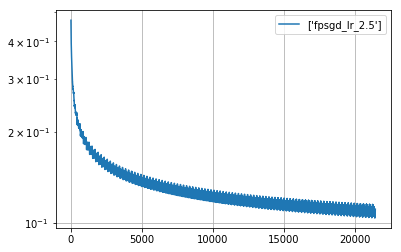

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_2.5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_2.5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_2.5_seed_1


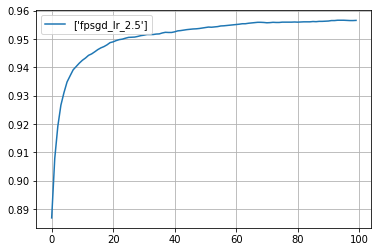

In [76]:
baseline_curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = ["fpsgd_lr_2.5"]
file_name = "train_loss.txt"
baseline_curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
plt.semilogy(baseline_curve_list[-1], label=folder_name_pre)
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

baseline_curve_list_test = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = ["fpsgd_lr_2.5"]
file_name = "eval_metric.txt"
baseline_curve_list_test.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
# print curve_list[-1]
plt.plot(baseline_curve_list_test[-1], label=folder_name_pre)
# plt.ylim( [3e9, 5e9] )
plt.legend()
plt.grid()
plt.show()

### bit centering

In [77]:
# curve_list = []
# preprocessor = lambda x: running_mean(x, N=50)
# plt.figure()
# for mu in ["1e-3", "1e-2", "1e-1", "1e0"]:
#     folder_name_pre = ["bit_center_lr_2.5_model_bits_16_mu_" + mu + "_epoch_T_2.0"]
#     file_name = "train_loss.txt"
#     curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
#     plt.semilogy(curve_list[-1], label=folder_name_pre)
# #     print curve_list[-1]
# # plt.ylim( [3e7, 3e9] )
# plt.legend()
# plt.grid()
# plt.show()

# curve_list = []
# preprocessor = lambda x: running_mean(x, N=50)
# plt.figure()
# for mu in ["1e-3", "1e-2", "1e-1", "1e0"]:
#     folder_name_pre = ["bit_center_lr_2.5_model_bits_16_mu_" + mu + "_epoch_T_2.0"]
#     file_name = "eval_metric.txt"
#     curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
#     plt.plot(curve_list[-1], label=folder_name_pre)
# #     print curve_list[-1]
# # plt.ylim( [3e7, 3e9] )
# plt.legend()
# plt.grid()
# plt.show()

In [78]:
# curve_list = []
# preprocessor = lambda x: running_mean(x, N=50)
# plt.figure()
# for mu in ["1e-3", "1e-2", "1e-1", "1e0"]:
#     folder_name_pre = ["bit_center_lr_2.5_model_bits_8_mu_" + mu + "_epoch_T_2.0"]
#     file_name = "train_loss.txt"
#     curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
#     plt.semilogy(curve_list[-1], label=folder_name_pre)
# #     print curve_list[-1]
# # plt.ylim( [3e7, 3e9] )
# plt.legend()
# plt.grid()
# plt.show()

# curve_list = []
# preprocessor = lambda x: running_mean(x, N=50)
# plt.figure()
# for mu in ["1e-3", "1e-2", "1e-1", "1e0"]:
#     folder_name_pre = ["bit_center_lr_2.5_model_bits_8_mu_" + mu + "_epoch_T_2.0"]
#     file_name = "eval_metric.txt"
#     curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
#     plt.plot(curve_list[-1], label=folder_name_pre)
# #     print curve_list[-1]
# # plt.ylim( [3e7, 3e9] )
# plt.legend()
# plt.grid()
# plt.show()

In [79]:
# curve_list = []
# preprocessor = lambda x: running_mean(x, N=50)
# plt.figure()
# for mu in ["1e-3", "1e-2", "1e-1", "1e0"]:
#     folder_name_pre = ["bit_center_lr_25_model_bits_4_mu_" + mu + "_epoch_T_2.0"]
#     file_name = "train_loss.txt"
#     curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
#     plt.semilogy(curve_list[-1], label=folder_name_pre)
# #     print curve_list[-1]
# # plt.ylim( [3e7, 3e9] )
# plt.legend()
# plt.grid()
# plt.show()

# curve_list = []
# preprocessor = lambda x: running_mean(x, N=50)
# plt.figure()
# for mu in ["1e-3", "1e-2", "1e-1", "1e0"]:
#     folder_name_pre = ["bit_center_lr_25_model_bits_4_mu_" + mu + "_epoch_T_2.0"]
#     file_name = "eval_metric.txt"
#     curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
#     plt.plot(curve_list[-1], label=folder_name_pre)
# #     print curve_list[-1]
# # plt.ylim( [3e7, 3e9] )
# plt.legend()
# plt.grid()
# plt.show()

### halp visualization

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-1_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-1_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd

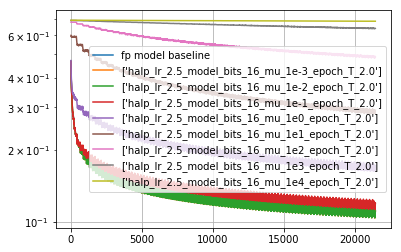

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-1_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_16_mu_1e-1_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd

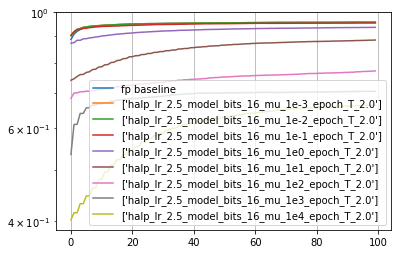

In [80]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp model baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4"]:
    folder_name_pre = ["halp_lr_2.5_model_bits_16_mu_" + mu + "_epoch_T_2.0"]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4"]:
    folder_name_pre = ["halp_lr_2.5_model_bits_16_mu_" + mu + "_epoch_T_2.0"]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-1_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-1_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_mode

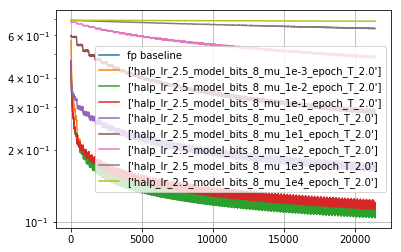

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-1_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_8_mu_1e-1_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_mode

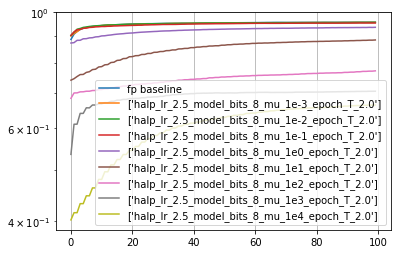

In [83]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4"]:
    folder_name_pre = ["halp_lr_2.5_model_bits_8_mu_" + mu + "_epoch_T_2.0"]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4"]:
    folder_name_pre = ["halp_lr_2.5_model_bits_8_mu_" + mu + "_epoch_T_2.0"]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-1_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-1_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_mode

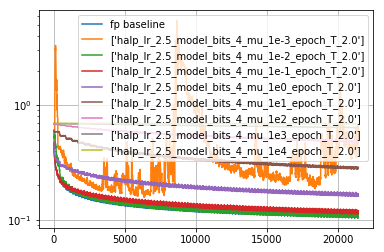

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-1_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_2.5_model_bits_4_mu_1e-1_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_mode

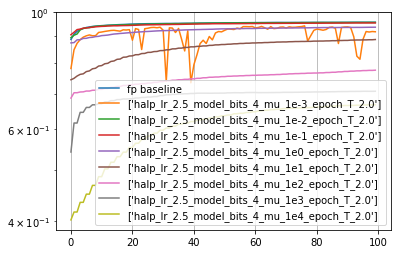

In [84]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4"]:
    folder_name_pre = ["halp_lr_2.5_model_bits_4_mu_" + mu + "_epoch_T_2.0"]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4"]:
    folder_name_pre = ["halp_lr_2.5_model_bits_4_mu_" + mu + "_epoch_T_2.0"]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

### lp sgd

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-6_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-6_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-6_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-4_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-4_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-4_seed_3
/

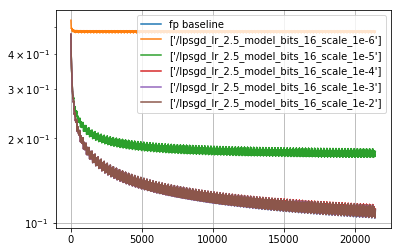

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-6_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-6_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-6_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-4_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-4_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_16_scale_1e-4_seed_3
/

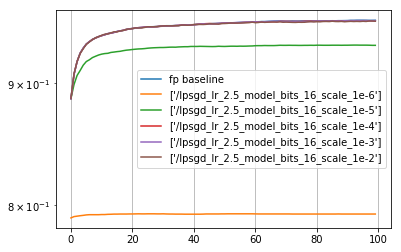

In [85]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
# for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1", "1e0", "1e1", "1e2"]:
for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2"]:
    folder_name_pre = ["/lpsgd_lr_2.5_model_bits_16_scale_" + str(scale) ]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
# for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1", "1e0", "1e1", "1e2"]:
for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2"]:
    folder_name_pre = ["/lpsgd_lr_2.5_model_bits_16_scale_" + str(scale), ]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-6_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-6_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-6_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-4_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-4_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-4_seed_2
/dfs/scrat

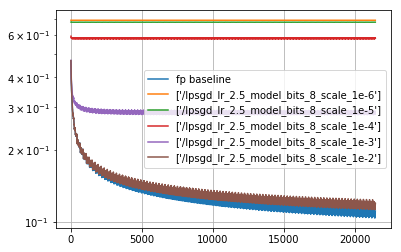

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-6_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-6_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-6_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-4_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-4_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_8_scale_1e-4_seed_2
/dfs/scrat

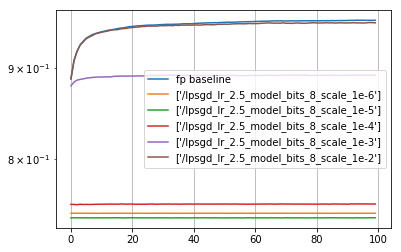

In [86]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
# for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1", "1e0", "1e1", "1e2"]:
for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2"]:
    folder_name_pre = ["/lpsgd_lr_2.5_model_bits_8_scale_" + str(scale) ]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
# for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1", "1e0", "1e1", "1e2"]:
for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2"]:
    folder_name_pre = ["/lpsgd_lr_2.5_model_bits_8_scale_" + str(scale) ]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-6_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-6_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-6_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-4_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-4_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-4_seed_1
/dfs/scrat

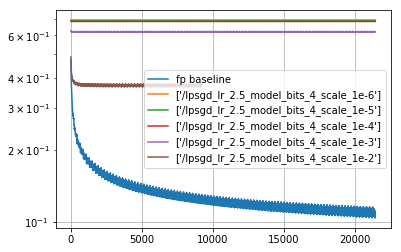

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-6_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-6_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-6_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-4_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-4_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_2.5_model_bits_4_scale_1e-4_seed_1
/dfs/scrat

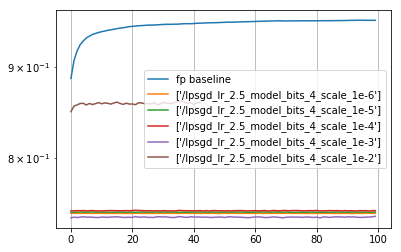

In [87]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
# for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1", "1e0", "1e1", "1e2"]:
for scale in ["1e-6", "1e-5", "1e-4", "1e-3", "1e-2"]:
    folder_name_pre = ["/lpsgd_lr_2.5_model_bits_4_scale_" + str(scale) ]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
# for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1", "1e0", "1e1", "1e2"]:
for scale in ["1e-6", "1e-5", "1e-4", "1e-3", "1e-2"]:
    folder_name_pre = ["/lpsgd_lr_2.5_model_bits_4_scale_" + str(scale) ]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

### using lr 25

### fp sgd visualization

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_25_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_25_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_25_seed_1


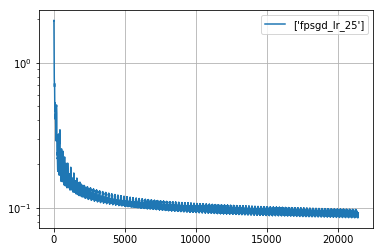

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_25_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_25_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/fpsgd_lr_25_seed_1


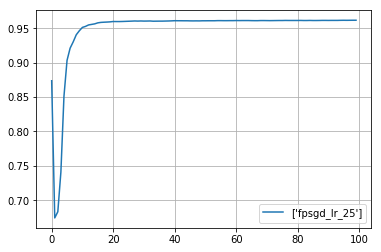

In [88]:
baseline_curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = ["fpsgd_lr_25"]
file_name = "train_loss.txt"
baseline_curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
plt.semilogy(baseline_curve_list[-1], label=folder_name_pre)
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

baseline_curve_list_best = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
folder_name_pre = ["fpsgd_lr_25"]
file_name = "eval_metric.txt"
baseline_curve_list_test.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
# print curve_list[-1]
plt.plot(baseline_curve_list_test[-1], label=folder_name_pre)
# plt.ylim( [3e9, 5e9] )
plt.legend()
plt.grid()
plt.show()

### bit centering

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-1_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-1_epoch_T_2.0_seed_2
/dfs/scr

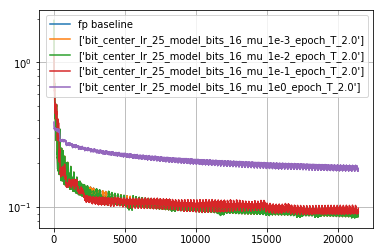

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-1_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_16_mu_1e-1_epoch_T_2.0_seed_2
/dfs/scr

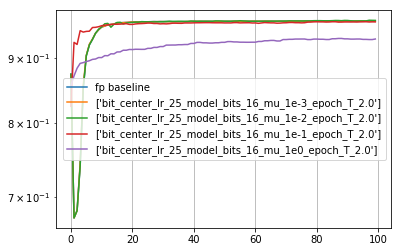

In [89]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0"]:
    folder_name_pre = ["bit_center_lr_25_model_bits_16_mu_" + mu + "_epoch_T_2.0"]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0"]:
    folder_name_pre = ["bit_center_lr_25_model_bits_16_mu_" + mu + "_epoch_T_2.0"]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-1_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-1_epoch_T_2.0_seed_1
/dfs/scratch0/zj

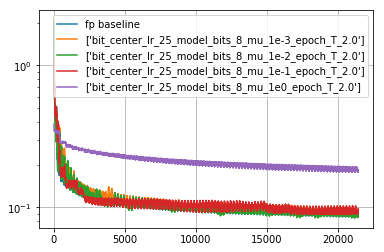

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-1_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_8_mu_1e-1_epoch_T_2.0_seed_1
/dfs/scratch0/zj

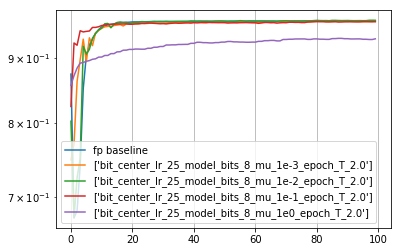

In [90]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0"]:
    folder_name_pre = ["bit_center_lr_25_model_bits_8_mu_" + mu + "_epoch_T_2.0"]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0"]:
    folder_name_pre = ["bit_center_lr_25_model_bits_8_mu_" + mu + "_epoch_T_2.0"]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-1_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-1_epoch_T_2.0_seed_1
/dfs/scratch0/zj

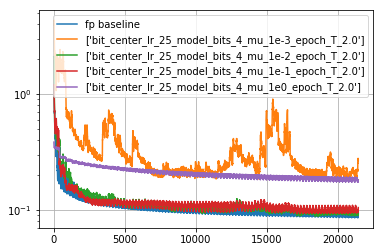

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-1_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/bit_center_lr_25_model_bits_4_mu_1e-1_epoch_T_2.0_seed_1
/dfs/scratch0/zj

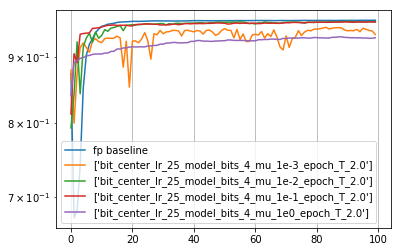

In [91]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0"]:
    folder_name_pre = ["bit_center_lr_25_model_bits_4_mu_" + mu + "_epoch_T_2.0"]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0"]:
    folder_name_pre = ["bit_center_lr_25_model_bits_4_mu_" + mu + "_epoch_T_2.0"]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

### halp visualization

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-1_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-1_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_mode

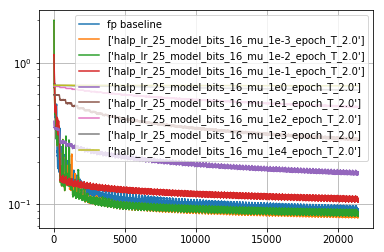

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-1_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_16_mu_1e-1_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_mode

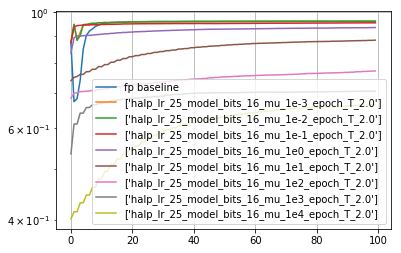

In [92]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4"]:
    folder_name_pre = ["halp_lr_25_model_bits_16_mu_" + mu + "_epoch_T_2.0"]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4"]:
    folder_name_pre = ["halp_lr_25_model_bits_16_mu_" + mu + "_epoch_T_2.0"]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-1_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-1_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_fea

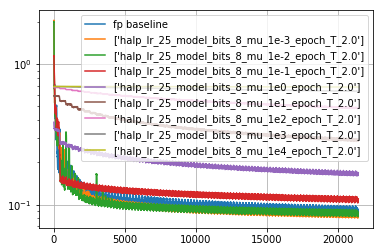

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-1_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_8_mu_1e-1_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_fea

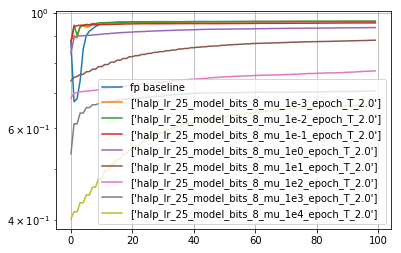

In [95]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4"]:
    folder_name_pre = ["halp_lr_25_model_bits_8_mu_" + mu + "_epoch_T_2.0"]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4"]:
    folder_name_pre = ["halp_lr_25_model_bits_8_mu_" + mu + "_epoch_T_2.0"]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-1_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-1_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_fea

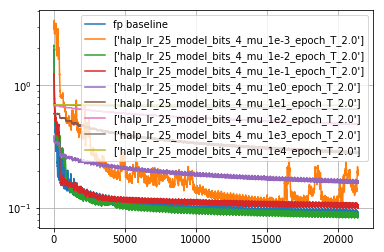

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-3_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-3_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-3_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-2_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-2_epoch_T_2.0_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-2_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-1_epoch_T_2.0_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/halp_lr_25_model_bits_4_mu_1e-1_epoch_T_2.0_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_fea

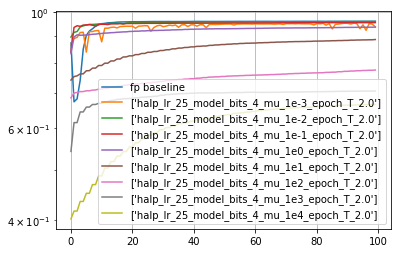

In [96]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4"]:
    folder_name_pre = ["halp_lr_25_model_bits_4_mu_" + mu + "_epoch_T_2.0"]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
for mu in ["1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4"]:
    folder_name_pre = ["halp_lr_25_model_bits_4_mu_" + mu + "_epoch_T_2.0"]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.plot(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

### lp sgd

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-6_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-6_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-6_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-4_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-4_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-4_seed_2
/dfs/scrat

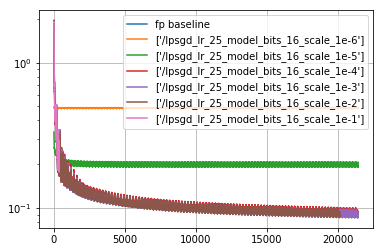

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-6_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-6_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-6_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-4_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-4_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_16_scale_1e-4_seed_2
/dfs/scrat

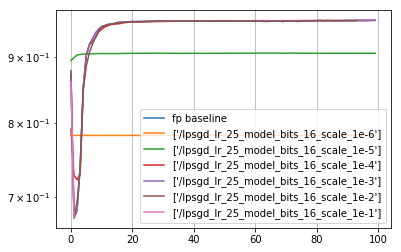

In [97]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
# for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1", "1e0", "1e1", "1e2"]:
for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1"]:
    folder_name_pre = ["/lpsgd_lr_25_model_bits_16_scale_" + str(scale) ]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
# for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1", "1e0", "1e1", "1e2"]:
for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1"]:
    folder_name_pre = ["/lpsgd_lr_25_model_bits_16_scale_" + str(scale), ]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-6_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-6_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-6_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-4_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-4_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-4_seed_3
/dfs/scratch0/zjian

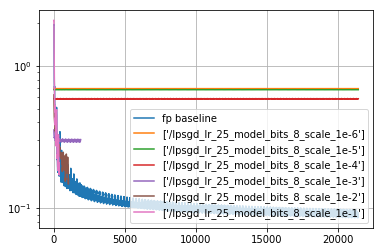

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-6_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-6_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-6_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-4_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-4_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_8_scale_1e-4_seed_3
/dfs/scratch0/zjian

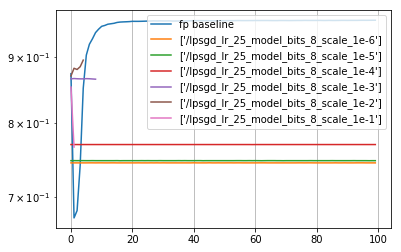

In [98]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
# for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1", "1e0", "1e1", "1e2"]:
for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1"]:
    folder_name_pre = ["/lpsgd_lr_25_model_bits_8_scale_" + str(scale) ]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
# for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1", "1e0", "1e1", "1e2"]:
for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1"]:
    folder_name_pre = ["/lpsgd_lr_25_model_bits_8_scale_" + str(scale) ]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-6_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-6_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-6_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-4_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-4_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-4_seed_3
/dfs/scratch0/zjian

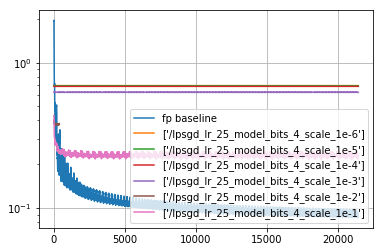

/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-6_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-6_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-6_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-5_seed_3
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-5_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-5_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-4_seed_2
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-4_seed_1
/dfs/scratch0/zjian/lp_kernel/codrna_results_sgd_lp_model_fp_feat/lpsgd_lr_25_model_bits_4_scale_1e-4_seed_3
/dfs/scratch0/zjian

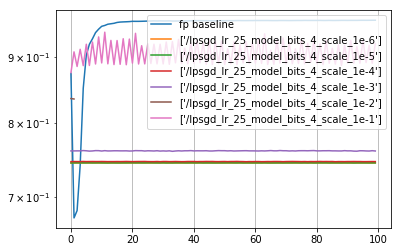

In [99]:
curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list[-1], label="fp baseline")
# for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1", "1e0", "1e1", "1e2"]:
for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1"]:
    folder_name_pre = ["/lpsgd_lr_25_model_bits_4_scale_" + str(scale) ]
    file_name = "train_loss.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()

curve_list = []
preprocessor = lambda x: running_mean(x, N=50)
plt.figure()
plt.semilogy(baseline_curve_list_test[-1], label="fp baseline")
# for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1", "1e0", "1e1", "1e2"]:
for scale in ["1e-6", "1e-5", "1e-4", "1e-3","1e-2", "1e-1"]:
    folder_name_pre = ["/lpsgd_lr_25_model_bits_4_scale_" + str(scale) ]
    file_name = "eval_metric.txt"
    curve_list.append(get_ave_value_from_multiple_seed(folder_name_pre, [], file_name, general_folder, preprocessor=None) )
    plt.semilogy(curve_list[-1], label=folder_name_pre)
#     print curve_list[-1]
# plt.ylim( [3e7, 3e9] )
plt.legend()
plt.grid()
plt.show()